### Soal Latihan

In [76]:
import base64
print(base64.b64decode("TmFtYQk6IFJpZnFpIE1hdWxhbmEgSmF0aQpOSU0JOiAyMjEwMTE0MDI0NDEKS2VsYXMJOiAwNVRQTE0wMDg=".encode()).decode())

Nama	: Rifqi Maulana Jati
NIM	: 221011402441
Kelas	: 05TPLM008


1. Buat Implementasi dengan menggunakan python untuk menghitung Fuzzy Inference System berikut dengan metode tsukamoto

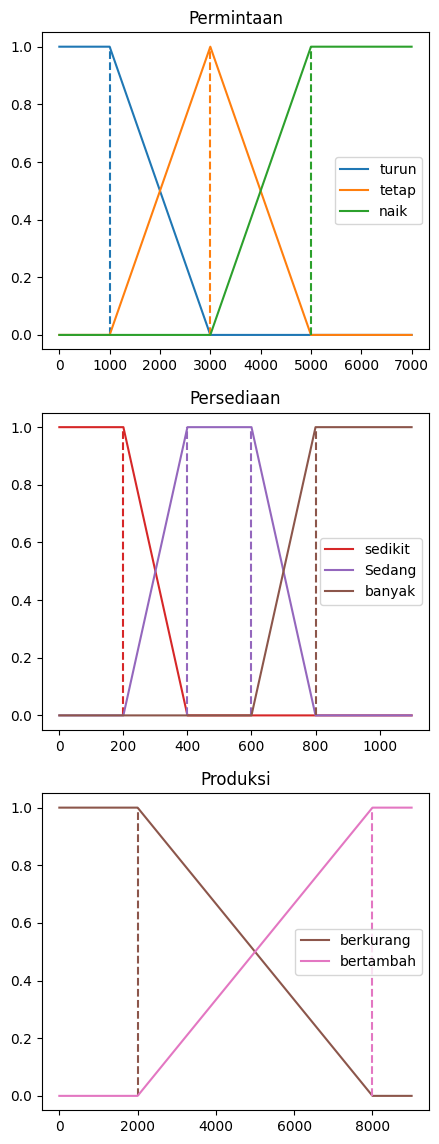

Rule:
- Jika Permintaan **Turun** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Turun** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Turun** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Tetap** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Naik** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Sedang** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Banyak** maka produksi **Berkurang**

In [1]:
class Fuzzy:
    def __init__(self):
        self.min = 0
        self.sedangAwal = 0
        self.sedangAkhir = 0
        self.max = 0

    def rendah(self,x):
        if x < self.min:
            return 1
        if x > self.sedangAwal:
            return 0
        return (self.sedangAwal - x) / (self.sedangAwal - self.min)
    
    def tinggi(self,x):
        if x <= self.sedangAkhir:
            return 0
        if x >= self.max:
            return 1
        return (x-self.sedangAkhir)/(self.max - self.sedangAkhir)

    def sedang(self,x):
        if x <= self.min or x >= self.max:
            return 0
        elif x <= self.sedangAwal:
            return 1 - self.rendah(x)
        elif x <= self.sedangAkhir:
            return 1
        else:
            return 1 - self.tinggi(x)


    def rev_down(self, f):
        return self.sedangAwal - f * (self.sedangAwal - self.min)

    def rev_up(self, f):
        return f * (self.max - self.sedangAkhir) + self.sedangAkhir
    # sedang gk bisa di reverse karena ada 2 kemungkina output

In [2]:
class Permintaan(Fuzzy):
    def __init__(self):
        self.min = 1000
        self.sedangAwal = 3000
        self.sedangAkhir = 3000
        self.max = 5000
    def turun(self, x):
        return self.rendah(x)
    def naik(self, x):
        return self.tinggi(x)
    def tetap(self,x):
        return self.sedang(x)

In [3]:
class Persediaan(Fuzzy):
    def __init__(self):
        self.min = 200
        self.sedangAwal = 400
        self.sedangAkhir = 600
        self.max = 800
    def sedikit(self, x):
        return self.rendah(x)
    def banyak(self, x):
        return self.tinggi(x)

In [4]:
class Produksi(Fuzzy):
    def __init__(self):
        self.min = 2000
        self.sedangAwal = 8000
        self.sedangAkhir = 2000
        self.max = 8000
    def berkurang(self, x):
        return self.rendah(x)
    def bertambah(self, x):
        return self.tinggi(x)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

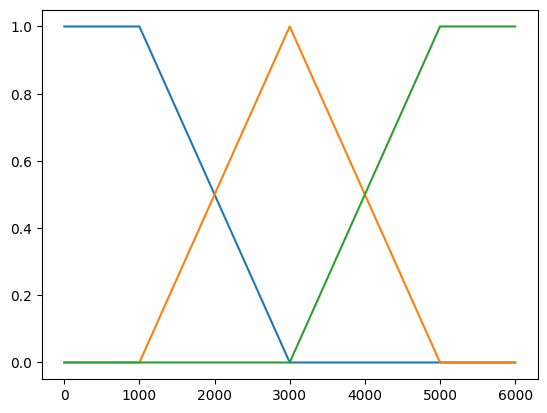

In [59]:
permintaan = Permintaan()
angkaPermintaan = list(range(0, 7000, 1000))
turun = [permintaan.turun(angka) for angka in angkaPermintaan]
tetap= [permintaan.tetap(angka) for angka in angkaPermintaan]
naik = [permintaan.naik(angka) for angka in angkaPermintaan]

xpoints = np.array(angkaPermintaan)

ypoints = np.array(turun)
plt.plot(xpoints, ypoints)

ypoints = np.array(tetap)
plt.plot(xpoints, ypoints)

ypoints = np.array(naik)
plt.plot(xpoints, ypoints)

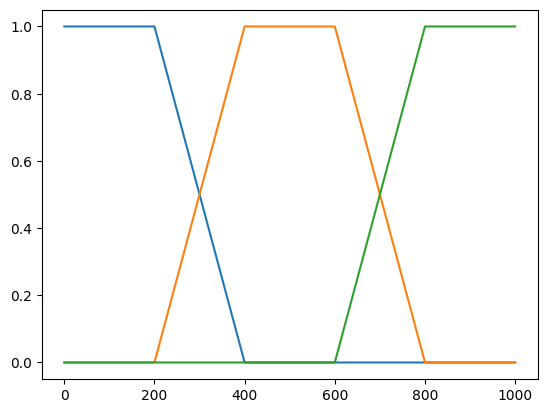

In [62]:
persediaan = Persediaan()
angkaPersediaan = list(range(0, 1100, 100))
sedikit = [persediaan.sedikit(angka) for angka in angkaPersediaan]
sedang= [persediaan.sedang(angka) for angka in angkaPersediaan]
banyak = [persediaan.banyak(angka) for angka in angkaPersediaan]

xpoints = np.array(angkaPersediaan)

ypoints = np.array(sedikit)
plt.plot(xpoints, ypoints)

ypoints = np.array(sedang)
plt.plot(xpoints, ypoints)

ypoints = np.array(banyak)
plt.plot(xpoints, ypoints)

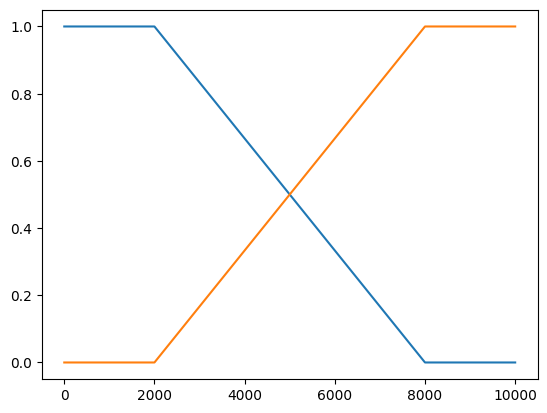

In [61]:
produksi = Produksi()
angkaProduksi = list(range(0, 11000, 1000))
berkurang = [produksi.berkurang(angka) for angka in angkaProduksi]
bertambah = [produksi.bertambah(angka) for angka in angkaProduksi]

xpoints = np.array(angkaProduksi)

ypoints = np.array(berkurang)
plt.plot(xpoints, ypoints)

ypoints = np.array(bertambah)
plt.plot(xpoints, ypoints)

In [18]:
import re

input_text = '''
Jika Permintaan Turun dan Persediaan Sedikit maka produksi Bertambah
Jika Permintaan Turun dan Persediaan Sedang maka produksi Berkurang
Jika Permintaan Turun dan Persediaan Banyak maka produksi Berkurang
Jika Permintaan Tetap dan Persediaan Sedikit maka produksi Bertambah
Jika Permintaan Tetap dan Persediaan Sedang maka produksi Berkurang
Jika Permintaan Tetap dan Persediaan Banyak maka produksi Berkurang
Jika Permintaan Naik dan Persediaan Sedikit maka produksi Bertambah
Jika Permintaan Naik dan Persediaan Sedang maka produksi Bertambah
Jika Permintaan Naik dan Persediaan Banyak maka produksi Berkurang
'''

pattern = re.compile(r"Jika Permintaan (\w+) dan Persediaan (\w+) maka produksi (\w+)")
lines = input_text.strip().split("\n")
for line in lines:
    match = pattern.search(line)
    if match:
        group1, group2, group3 = match.groups()
        print(f'    ("{group1}", "{group2}"): "{group3}",')

    ("Turun", "Sedikit"): "Bertambah",
    ("Turun", "Sedang"): "Berkurang",
    ("Turun", "Banyak"): "Berkurang",
    ("Tetap", "Sedikit"): "Bertambah",
    ("Tetap", "Sedang"): "Berkurang",
    ("Tetap", "Banyak"): "Berkurang",
    ("Naik", "Sedikit"): "Bertambah",
    ("Naik", "Sedang"): "Bertambah",
    ("Naik", "Banyak"): "Berkurang",


In [16]:
rule_mapping = {
    ("Turun", "Sedikit"): "Bertambah",
    ("Turun", "Sedang"): "Berkurang",
    ("Turun", "Banyak"): "Berkurang",
    ("Tetap", "Sedikit"): "Bertambah",
    ("Tetap", "Sedang"): "Berkurang",
    ("Tetap", "Banyak"): "Berkurang",
    ("Naik", "Sedikit"): "Bertambah",
    ("Naik", "Sedang"): "Bertambah",
    ("Naik", "Banyak"): "Berkurang",
}

In [64]:
total_value = 0
total_fuzzy = 0
for k, v in rule_mapping.items():
    # print(f"{k[0]=}, {k[1]=}")
    # print(f"{v=}")
    demand = Permintaan()
    stock = Persediaan()
    demand_value = 4500
    stock_value = 550

    statePermintaan = {
        "Turun":demand.turun,
        "Tetap":demand.tetap,
        "Naik":demand.naik,
    }

    statePersediaan = {
        "Sedikit":stock.sedikit,
        "Sedang":stock.sedang,
        "Banyak":stock.banyak,
    }
    

    fuzzy_demand = statePermintaan[k[0]](demand_value)
    fuzzy_stock =  statePersediaan[k[1]](stock_value)

    prod = Produksi()
    fuzzy_prod = min(fuzzy_demand, fuzzy_stock)
    prod_value = prod.rev_down(fuzzy_prod) if v == "Berkurang" else prod.rev_up(fuzzy_prod)

    total_value += fuzzy_prod * prod_value
    total_fuzzy += fuzzy_prod
    # print(prod_value)

result = int(total_value/ total_fuzzy)
# result = prod.rev_up(result)
print(f"Jadi, yang harus diproduksi sebanyak {result} kemasan.")



Jadi, yang harus diproduksi sebanyak 4500 kemasan.


2. Buat Slide yang berisikan contoh penghitungan manual dari soal diatas!

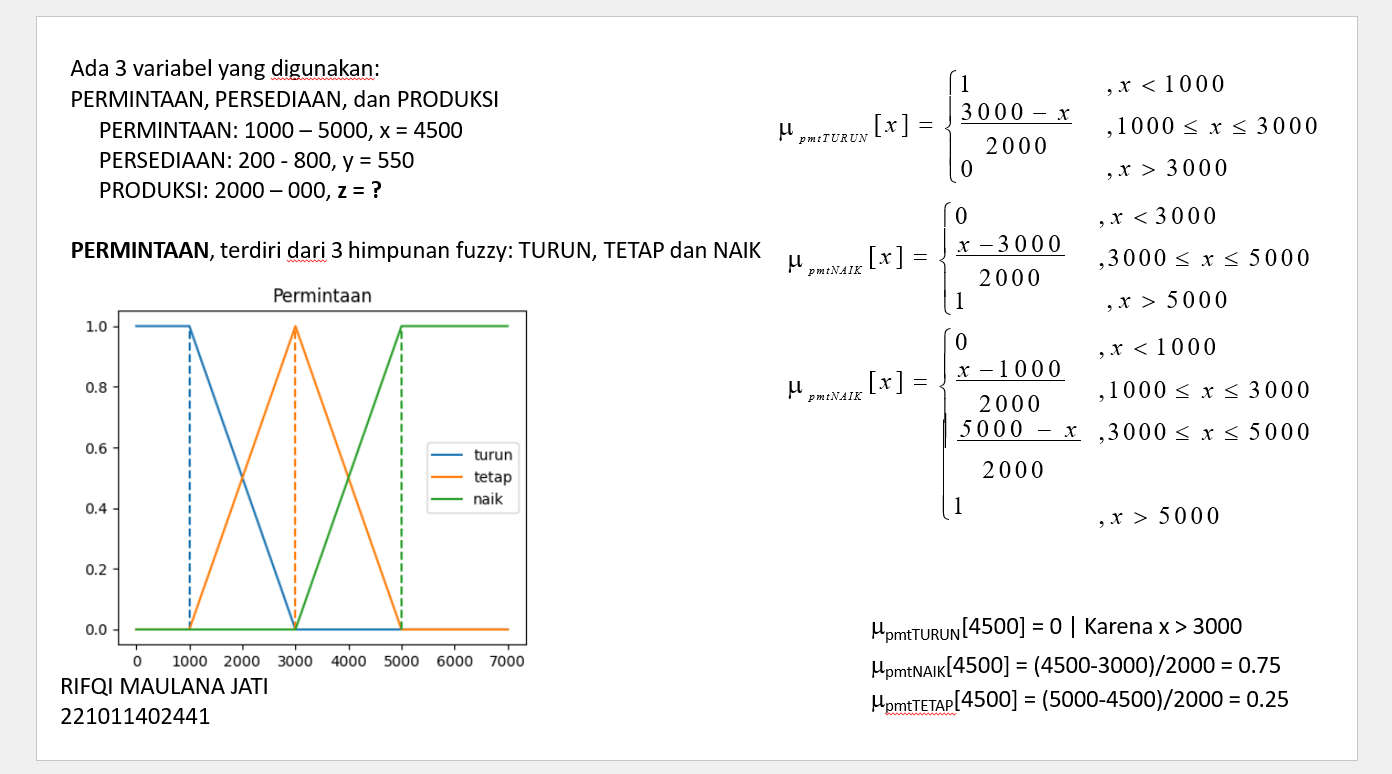

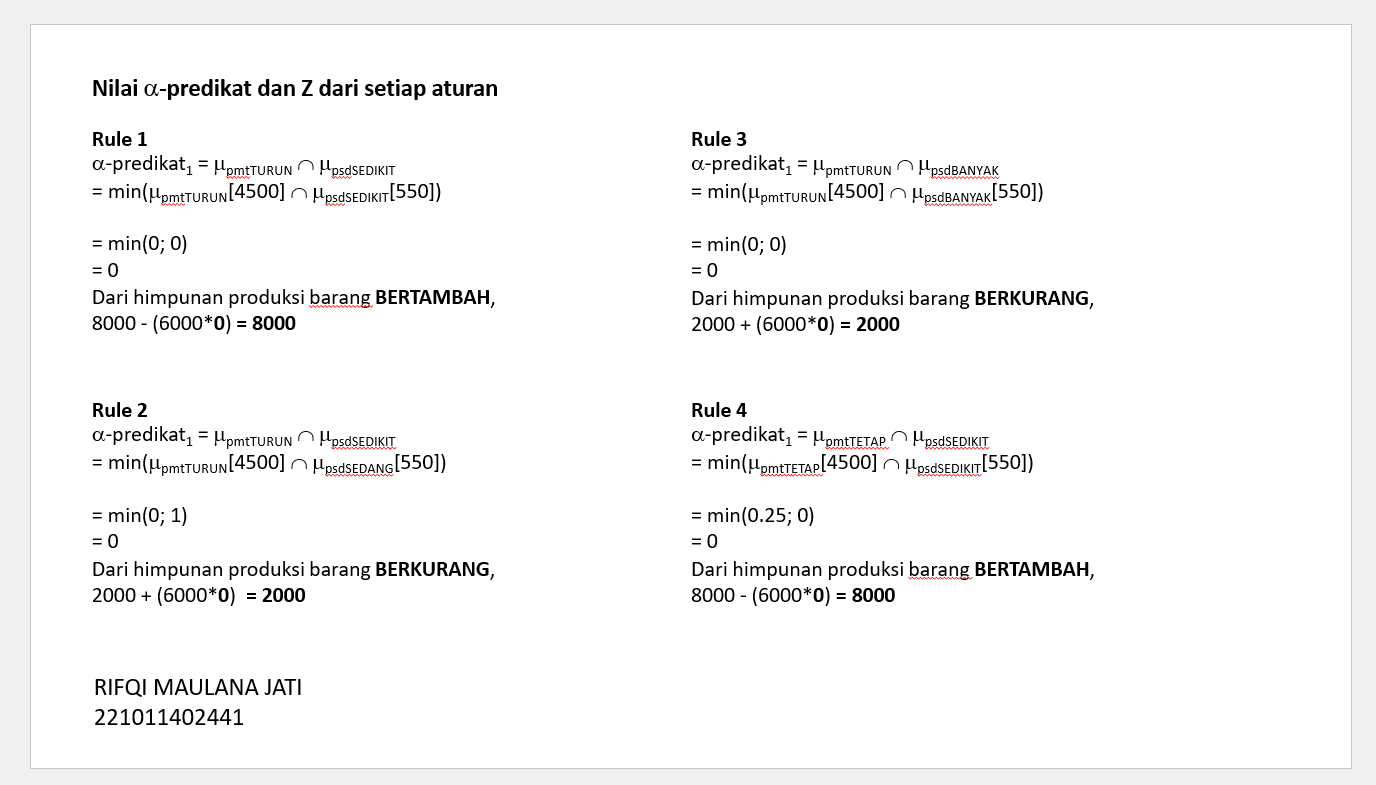

In [75]:
import base64
print(base64.b64decode("TmFtYQk6IFJpZnFpIE1hdWxhbmEgSmF0aQpOSU0JOiAyMjEwMTE0MDI0NDEKS2VsYXMJOiAwNVRQTE0wMDg=".encode()).decode())

Nama	: Rifqi Maulana Jati
NIM	: 221011402441
Kelas	: 05TPLM008
